## Load Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---

## Load Data

In [5]:
df =pd.read_csv('Tata Car reviews.csv',encoding='latin-1')

In [195]:
df.shape

(1703, 17)

In [194]:
df.head(2)

,Car_Name,Review,comfort,economy,familiarity,like,looks,model,overall,performance,purchase_condition,review_date,total_likes,user_name,value_for_money,fe_datetime,fe_datetime_labels
0,Tata Harrier,NaN,5,4,Have driven for a few hundred kilometres,2,5,XZ,5,5,New,2019-01-25,2,TUSHARKUMAR PARMAR,5,1.018501,1 to 3months
1,Tata Harrier,NaN,5,5,Have driven for a few hundred kilometres,2,5,XE,5,5,New,2019-02-05,2,Devendra Sharma,5,0.657098,0 to 1month


---

## Basic Analysis

Text(0,0.5,'Reviews')

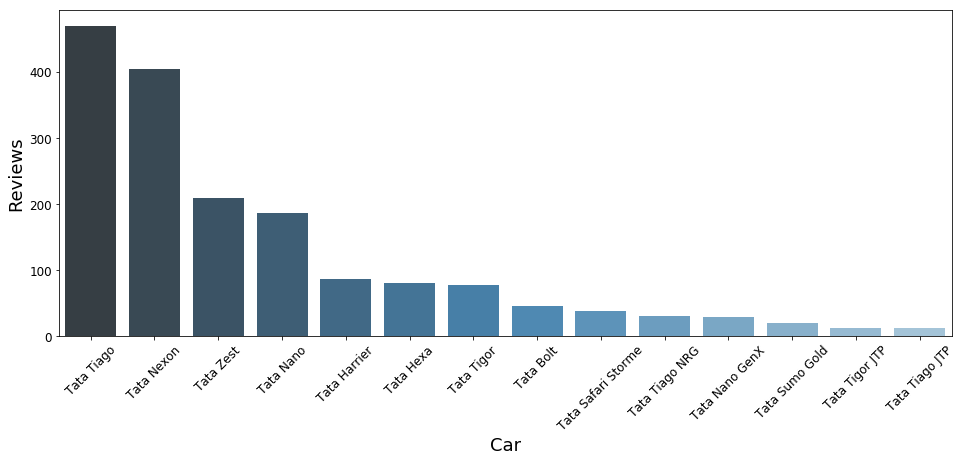

In [127]:
# plt.figure(figsize=(10,5))

# df.groupby(['Car_Name']).size().sort_values(ascending=False).plot.bar()

import seaborn as sns
val_popularity =df.groupby(['Car_Name']).size().sort_values(ascending=False)

plt.figure(figsize=(16,6))
sns.barplot(x=val_popularity.index, y=val_popularity.values , palette="Blues_d")


plt.xticks(rotation= 45,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Car',fontsize=18)
plt.ylabel('Reviews',fontsize=18)

### Tata Tiago and Tata Nexon have got maximum no of reviews 

Text(0,0.5,'Comfort')

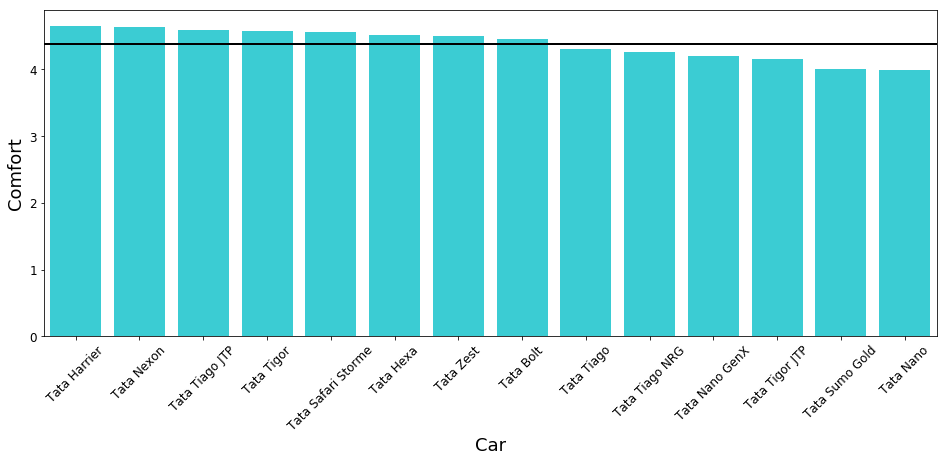

In [125]:
# plt.figure(figsize=(10,5))
# df.groupby(['Car_Name'])['comfort'].mean().sort_values(ascending=False).plot.bar()

import seaborn as sns
val_comfort =df.groupby(['Car_Name'])['comfort'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,6))
ax = sns.barplot(x=val_comfort.index, y=val_comfort.values ,color='#22E3EC')
ax.axhline(val_comfort.values.mean(), color='black', linewidth=2)

plt.xticks(rotation= 45,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Car',fontsize=18)
plt.ylabel('Comfort',fontsize=18)

### Black Line marks the Overall Average , Tata Harrier ,Tata Nexon ,Tata Tiago JTP are best in terms of comfort

Text(0,0.5,'Economy')

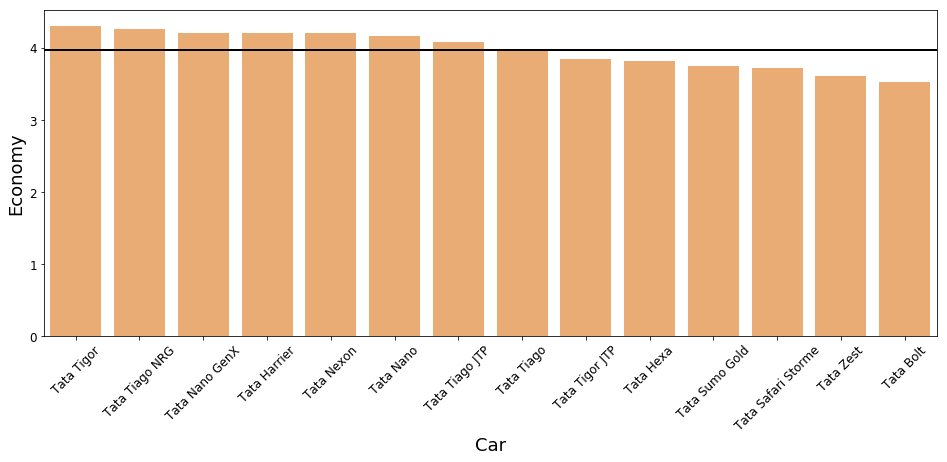

In [128]:
# plt.figure(figsize=(10,5))
# df.groupby(['Car_Name'])['economy'].mean().sort_values(ascending=False).plot.bar()

import seaborn as sns
val_eco =df.groupby(['Car_Name'])['economy'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,6))
ax = sns.barplot(x=val_eco.index, y=val_eco.values ,color='#FEAB61')
ax.axhline(val_eco.values.mean(), color='black', linewidth=2)

plt.xticks(rotation= 45,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Car',fontsize=18)
plt.ylabel('Economy',fontsize=18)

### Black Line marks the Overall Average ,Tata Tigor ,Tata Tiago NRG Tata Nano GenX are best in terms of economy

Text(0,0.5,'Performance')

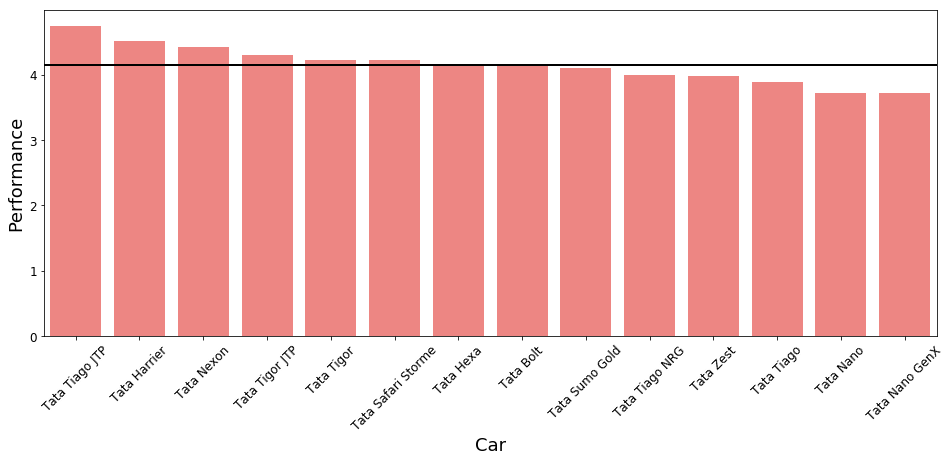

In [129]:
# df.groupby(['Car_Name'])['performance'].mean().sort_values(ascending=False).plot.bar()

import seaborn as sns
val_perf =df.groupby(['Car_Name'])['performance'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,6))
ax = sns.barplot(x=val_perf.index, y=val_perf.values ,color='#FF7671')
ax.axhline(val_perf.values.mean(), color='black', linewidth=2)

plt.xticks(rotation= 45,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Car',fontsize=18)
plt.ylabel('Performance',fontsize=18)

### Black Line marks the Overall Average Tata Tiago JTP,Tata Harrier,Tata Nexon are best in terms of performance

Text(0,0.5,'Overall')

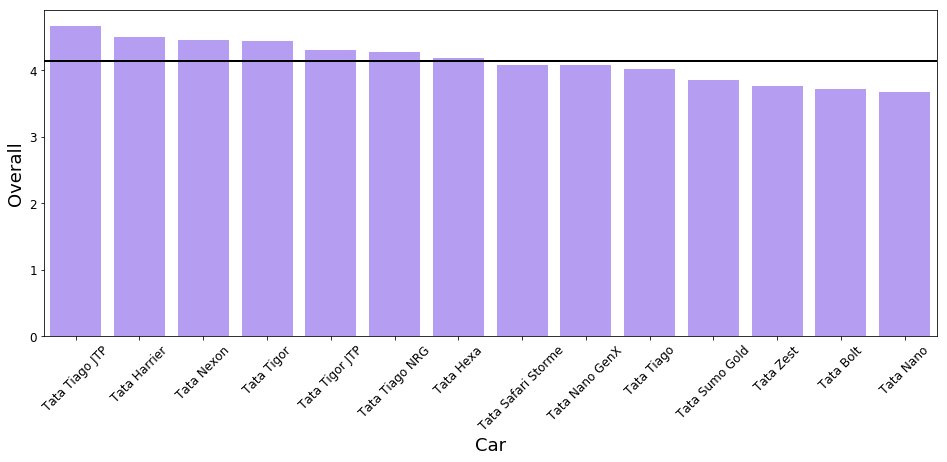

In [196]:
import seaborn as sns
val_overall =df.groupby(['Car_Name'])['overall'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,6))
ax = sns.barplot(x=val_overall.index, y=val_overall.values ,color='#AF90FF')
ax.axhline(val_overall.values.mean(), color='black', linewidth=2)

plt.xticks(rotation= 45,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Car',fontsize=18)
plt.ylabel('Overall',fontsize=18)

### Black Line marks the Overall Average Tata Tiago JTP,Tata Harrier,Tata Nexon are best overall

Text(0,0.5,'Value For Money')

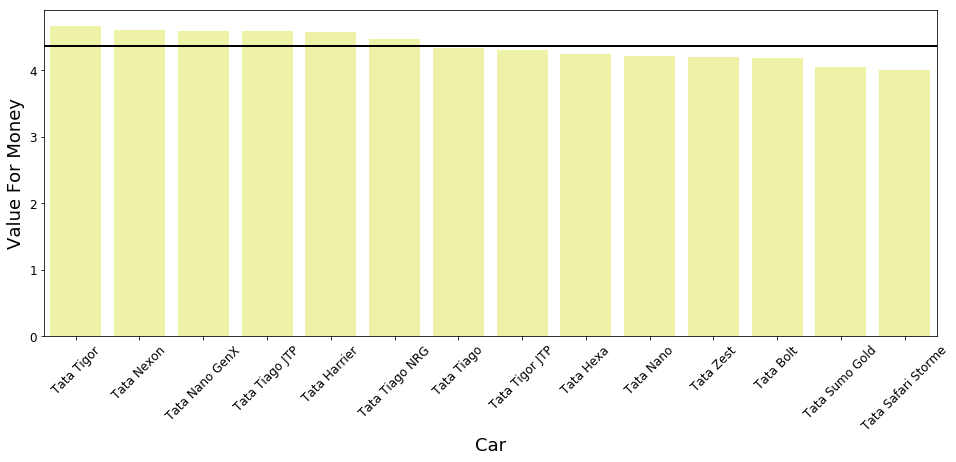

In [131]:
import seaborn as sns
val_money =df.groupby(['Car_Name'])['value_for_money'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,6))
ax = sns.barplot(x=val_money.index, y=val_money.values ,color='#F8FE9B')
ax.axhline(val_money.values.mean(), color='black', linewidth=2)

plt.xticks(rotation= 45,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Car',fontsize=18)
plt.ylabel('Value For Money',fontsize=18)


### Black Line marks the Overall Average Tata Tigor,Tata Nexon,Tata Nano GenX are best in terms of value for money

### Observation:Tata Nexon has above average scores accross all the performance metrics

---

## Time Based Analysis

### Feature Enginnering Datetime column

In [138]:
pd.to_datetime('today')

Timestamp('2019-02-25 00:00:00')

In [198]:
df['fe_datetime'] =(pd.to_datetime('today') - pd.to_datetime(df['review_date']))/np.timedelta64(1, 'M')

df['fe_datetime_labels'] =pd.Series(np.repeat('> 1 year',fe_datetime.shape[0]))

df.loc[(df.fe_datetime<=1),"fe_datetime_labels"] = '0 to 1month'

df.loc[((df.fe_datetime>1)&(df.fe_datetime<=3)) ,"fe_datetime_labels"]= '1 to 3months'

df.loc[((df.fe_datetime>3)&(df.fe_datetime<=6)) ,"fe_datetime_labels"]= '3 to 6months'

df.loc[(df.fe_datetime>6) ,"fe_datetime_labels"]= 'more than 6months'

print(df.fe_datetime_labels.value_counts())

more than 6months    857
1 to 3months         333
3 to 6months         303
0 to 1month          210
Name: fe_datetime_labels, dtype: int64


### List of Cars

In [164]:
df.Car_Name.unique()

array(['Tata Harrier', 'Tata Nexon', 'Tata Tiago', 'Tata Tigor',
       'Tata Safari Storme', 'Tata Hexa', 'Tata Zest', 'Tata Sumo Gold',
       'Tata Nano GenX', 'Tata Tiago NRG', 'Tata Tiago JTP', 'Tata Bolt',
       'Tata Nano', 'Tata Tigor JTP'], dtype=object)

In [192]:
def get_Car_Metrics(car_name):
    Performance_Metrics =['value_for_money','overall','performance','comfort', 'economy']
    
    print('Car {}'.format(car_name))

    for metric in Performance_Metrics:
        y1 =df.groupby(['fe_datetime_labels'])[metric].mean()
        y2 =df[df.Car_Name==car_name].groupby(['fe_datetime_labels'])[metric].mean()

        df_y =pd.concat([y2,y1],axis=1)

        df_y.columns=["Your Car Avg","All Car Avg"]
        print('Report Based on parameter {}'.format(metric),'\n')
        print(df_y,'\n')

In [193]:
get_Car_Metrics('Tata Nexon')

Car Tata Nexon
Report Based on parameter value_for_money 

                    Your Car Avg  All Car Avg
fe_datetime_labels                           
0 to 1month             4.807018     4.595238
1 to 3months            4.731092     4.612613
3 to 6months            4.329268     4.438944
more than 6months       4.582192     4.225204 

Report Based on parameter overall 

                    Your Car Avg  All Car Avg
fe_datetime_labels                           
0 to 1month             4.508772     4.428571
1 to 3months            4.680672     4.531532
3 to 6months            4.219512     4.260726
more than 6months       4.369863     3.805134 

Report Based on parameter performance 

                    Your Car Avg  All Car Avg
fe_datetime_labels                           
0 to 1month             4.596491     4.433333
1 to 3months            4.579832     4.369369
3 to 6months            4.243902     4.181518
more than 6months       4.349315     3.873979 

Report Based on parameter comfo